<a href="https://colab.research.google.com/github/Praveen2005417/Naan-Mudhalvan/blob/main/Fake%20New%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9829621380846325
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      4781
           1       0.98      0.98      0.98      4199

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



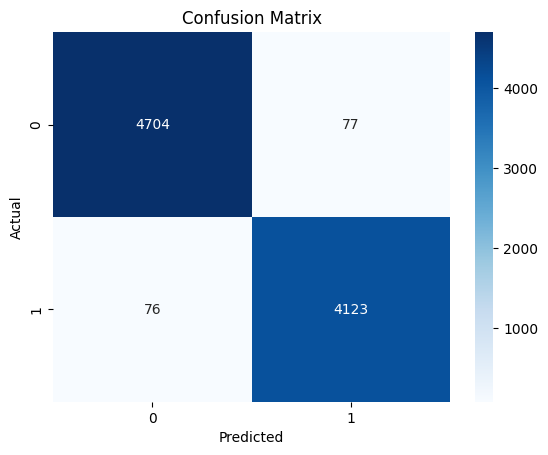

In [1]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Dataset (Assuming already uploaded)
df_fake = pd.read_csv('Fake.csv')
df_true = pd.read_csv('True.csv')

# Step 2: Label the data
df_fake['label'] = 0  # Fake news
df_true['label'] = 1  # Real news

# Step 3: Merge and Shuffle
df = pd.concat([df_fake, df_true])
df = df.sample(frac=1).reset_index(drop=True)

# Optional: Drop unnecessary columns
if 'title' in df.columns and 'subject' in df.columns and 'date' in df.columns:
    df.drop(['title', 'subject', 'date'], axis=1, inplace=True)

# Step 4: Clean the Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\[.*?\]", "", text)
    text = re.sub(r"https?://\S+|www\.\S+", "", text)
    text = re.sub(r"<.*?>+", "", text)
    text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)
    text = re.sub(r"\n", " ", text)
    text = re.sub(r"\w*\d\w*", "", text)
    return text

# Apply cleaning
df['text'] = df['text'].apply(clean_text)

# Step 5: Split the Data
X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Vectorization
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 7: Train Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Step 8: Predict and Evaluate
y_pred = model.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
